In [1]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

# 1. 라이브러리 선언

In [2]:
import keras

C:\Users\SMART-14\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import os ###원하는 패쓰 하나씩 확인
import cv2
import keras
# 케라스 모델 생성 라이브러리
from keras import models
# 레이어 생성 라이브러리 (Dense: 입출력 연결)
from keras import layers
# 케라스 샘플데이터[mnist] 라이브러리 불러오기
from keras.datasets import mnist
# numpy 라이브러리
import numpy as np
from numpy import array
# 케라스 카테고리 라이브러리
from keras.utils import to_categorical
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
# 시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline

# 2. 데이터 불러오기

In [4]:
import cv2
import os
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

### 1. 훈련데이터 

In [5]:
TRAIN_DIR = '../images/mnist/trainingSet/'
train_folder_list = array(os.listdir(TRAIN_DIR))

train_folder_list

array(['0_zero', '1_one', '2_two', '3_three', '4_four', '5_five', '6_six',
       '7_seven', '8_eight', '9_nine'], dtype='<U7')

In [6]:
IMG_SIZE = 28
train_images=[]
train_labels=[]
for index in range(len(train_folder_list)):
    path = os.path.join(TRAIN_DIR, train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            train_images.append(new_img)
            train_labels.append(index)
        except:
            pass

### 2. 테스트 데이터 

In [7]:
TEST_DIR = '../images/mnist/testSet/'
test_folder_list = array(os.listdir(TEST_DIR))
test_folder_list

test_images=[]
test_labels=[]
for index in range(len(test_folder_list)):
    path = os.path.join(TEST_DIR, test_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        test_images.append(new_img)
        test_labels.append(index)

### 3. 데이터셋 확인

In [8]:
train_images = array(train_images)
train_labels = array(train_labels)
test_images = array(test_images)
test_labels = array(test_labels)

In [9]:
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (42000, 28, 28) (42000,)
Testing data shape :  (200, 28, 28) (200,)


In [10]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
 # 훈련데이터의 답지분류 범위 정의
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'label : 2')

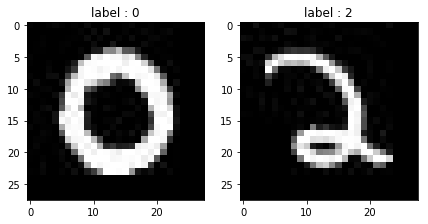

In [12]:
# 훈련/데이터 데이터 시각화
plt.figure(figsize=[7,5])
plt.subplot(121)
plt.imshow(train_images[0], cmap='gray')
plt.title("label : {}".format(train_labels[0]))
plt.subplot(122)
plt.imshow(test_images[42], cmap='gray')
plt.title("label : {}".format(test_labels[42]))

### 3-1. 이미지(28*28) 매트릭스 변환 (w,h,d)

In [13]:
train_images.shape

(42000, 28, 28)

In [14]:
train_data = train_images.reshape(len(train_images), IMG_SIZE,IMG_SIZE)
test_data = test_images.reshape(len(test_images), IMG_SIZE,IMG_SIZE)

In [15]:
train_images.shape

(42000, 28, 28)

In [16]:
train_data.shape

(42000, 28, 28)

In [17]:
train_images[0][1]

array([ 0,  0,  0,  0,  0,  0,  0,  1,  5,  0, 12,  0, 16,  0,  0,  4,  0,
        2,  8,  3,  0,  4,  8,  0,  0,  0,  0,  0], dtype=uint8)

### 3-2. float 타입변환 및 정규화

In [18]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

train_data /= 255   ##그레이 컬러 0~255
test_data /= 255

### 3-3. 답지 분류형으로 변환

In [19]:
from keras.utils import to_categorical

In [20]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[10000])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[10000])

Original label 0 :  2
After conversion to categorical ( one-hot ) :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
from numpy import argmax

In [22]:
argmax(train_labels_one_hot[10000])

2

In [23]:
from sklearn.preprocessing import OneHotEncoder
oe_label = OneHotEncoder()

train_labels_t = train_labels.reshape(-1,1)
test_labels_t = test_labels.reshape(-1,1)
oe_label.fit(train_labels_t)
train_labels_one_hot = oe_label.transform(train_labels_t).toarray()
test_labels_one_hot = oe_label.transform(test_labels_t).toarray()

In [24]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[2
                                         
                                         
                                         ])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[2])

Original label 0 :  0
After conversion to categorical ( one-hot ) :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 4. 케라스 모델 정의

In [25]:
# 입력데이터 형태
modelDim = train_data[0].shape
modelDim

(28, 28)

In [26]:
import keras
from keras import Sequential
from keras.layers import Flatten, Dense

In [27]:
# 입력데이터 형태
modelDim = train_data[0].shape

# 층 누적 기본형태
model = Sequential()

# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(Flatten(input_shape=modelDim))
model.add(Dense(8, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


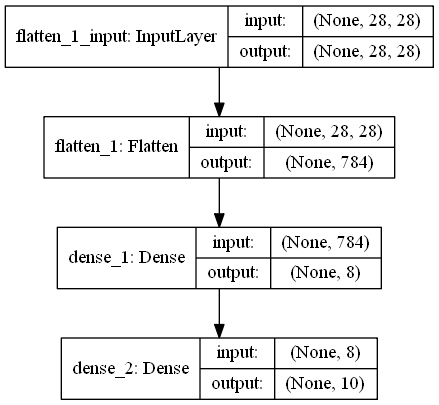

In [28]:
# 모델 시각화
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True)
from IPython.display import Image
Image(retina=True, filename='model_plot.png')

# 5. 케라스모델 훈련방법 설정

In [29]:
# Sequatial 방싱 케라스모델
# 손실함수(LOSS): 훈련동안 최소화될 값 지표 (mse, categorical_crossentropy)
# 손실함수를 기반으로 Neural Net 업데이터 결정 (mse, mae, accuracy)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# 6. 모델 훈련

In [30]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [31]:
import timeit
start = timeit.default_timer()

# 실행 코드

stop = timeit.default_timer()
print("총 소요시간: ", stop - start)

총 소요시간:  1.7887949299100293e-05


In [32]:
from datetime import datetime
now = datetime.now()
date = now.strftime("%Y-%m-%d_%H%M")
save_dir = "./logs_{}".format(date)

callbacks = [
    
    keras.callbacks.TensorBoard(
    log_dir = save_dir,
    write_graph=True,
    write_images=True)
    ,  
    keras.callbacks.EarlyStopping(
    monitor = 'val_acc', patience=10,
    )
]

# 모델을 32개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련
history = model.fit(train_data, train_labels_one_hot, 
                    batch_size=32,
                    epochs=20,
                    callbacks = callbacks)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20
42000/42000 [==============================] - 1s 29us/step - loss: 0.7143 - acc: 0.7951
Epoch 2/20
 8448/42000 [=====>........................] - ETA: 0s - loss: 0.3786 - acc: 0.8903

C:\Users\SMART-14\Anaconda3\lib\site-packages\keras\callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


42000/42000 [==============================] - 1s 24us/step - loss: 0.3613 - acc: 0.8981
Epoch 3/20
42000/42000 [==============================] - 1s 24us/step - loss: 0.3144 - acc: 0.9121
Epoch 4/20
42000/42000 [==============================] - 1s 24us/step - loss: 0.2940 - acc: 0.9174
Epoch 5/20
42000/42000 [==============================] - 1s 24us/step - loss: 0.2807 - acc: 0.9212
Epoch 6/20
42000/42000 [==============================] - 1s 24us/step - loss: 0.2729 - acc: 0.9227
Epoch 7/20
42000/42000 [==============================] - 1s 24us/step - loss: 0.2650 - acc: 0.9252
Epoch 8/20
42000/42000 [==============================] - 1s 24us/step - loss: 0.2594 - acc: 0.9266
Epoch 9/20
42000/42000 [==============================] - 1s 24us/step - loss: 0.2540 - acc: 0.9278
Epoch 10/20
42000/42000 [==============================] - 1s 24us/step - loss: 0.2508 - acc: 0.9290
Epoch 11/20
42000/42000 [==============================] - 1s 26us/step - loss: 0.2456 - acc: 0.9301
Epoch 12/

In [33]:
import pandas as pd

In [34]:
pd.DataFrame(history.history)

,loss,acc
0,0.714312,0.795071
1,0.361348,0.898095
2,0.314430,0.912095
3,0.294018,0.917429
4,0.280742,0.921238
5,0.272918,0.922690
6,0.264975,0.925190
7,0.259423,0.926571
8,0.253998,0.927762
9,0.250824,0.929000


# 7. 모델 추론

In [35]:
# verbose: 정보표시 레벨 (0,1)
test_loss, test_acc = model.evaluate(test_data, 
                                     test_labels_one_hot)
print(test_loss, test_acc)


200/200 [==============================] - 0s 150us/step
0.2186962080001831 0.955


In [36]:
pwd


'C:\\Users\\SMART-14\\python_practice\\Session06 - Computer Vision'

# 8. 훈련내용 확인하기 (Tensorboard)

# 9. 예측 및 비교

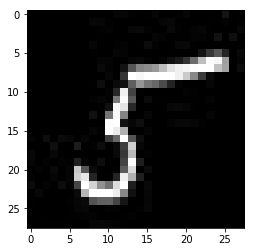

In [37]:
prd_images = []
imgpah="../images/mnist/testSet/5/img_24.jpg"
img = cv2.imread(imgpah, cv2.IMREAD_GRAYSCALE)
prd_images.append(img)
prd_images=array(prd_images)

plt.imshow(img, cmap="gray")

In [38]:
test_data = prd_images.reshape(len(prd_images) , IMG_SIZE, IMG_SIZE)
test_data = test_data.astype('float')
test_data /= 255

In [39]:
# Predict the most likely class
label_pred = model.predict(test_data[[0],:])

In [40]:
label_pred

array([[2.87436740e-03, 1.65500865e-06, 1.18178295e-05, 1.81065679e-05,
        4.69444194e-06, 9.96016204e-01, 1.51167187e-05, 4.22774029e-08,
        1.05705869e-03, 9.23945379e-07]], dtype=float32)

In [41]:
np.argmax(label_pred)

5

### 다른모델 생성 (과적합 회피)

In [42]:
model_reg = models.Sequential()
model_reg.add(layers.Dense(512, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE,)))
model_reg.add(layers.Dropout(0.5))
model_reg.add(layers.Dense(512, activation='relu'))
model_reg.add(layers.Dropout(0.5))
model_reg.add(layers.Dense(nClasses, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [44]:
# Predict the most likely class
label_pred = model.predict(test_data[[0],:])

In [45]:
label_pred

array([[2.87436740e-03, 1.65500865e-06, 1.18178295e-05, 1.81065679e-05,
        4.69444194e-06, 9.96016204e-01, 1.51167187e-05, 4.22774029e-08,
        1.05705869e-03, 9.23945379e-07]], dtype=float32)

### [실습]. fashion_mnist 데이터를 활용하여 신경망구조를 생성하고 훈련시켜보세요
### keras.datasets.fashion_mnist.load_data()

### [실습] 제공된 cat_dog 이미지 파일을 학습 후 cat / dog 이미지 분류기를 생성하세요
